# Spark indirme kurma işlemleri

In [6]:
#!pip3 install findspark

In [7]:
import findspark
findspark.init("/Users/necmiyesoyla/spark/spark-3.3.2-bin-hadoop3")

In [8]:
import pyspark
from pyspark import SparkContext

# Konfigurasyon ve Spark Bağlantısı

In [9]:
from pyspark import SparkContext
sc=SparkContext(master="local")
sc

23/03/03 20:40:53 WARN Utils: Your hostname, Necmiyes-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.40 instead (on interface en0)
23/03/03 20:40:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/03 20:40:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/03 20:40:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


<SparkContext master=local appName=pyspark-shell>

In [10]:
sc.version

'3.3.2'

In [11]:
sc.sparkUser()

'necmiyesoyla'

In [12]:
sc.appName

'pyspark-shell'

In [13]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addArchive',
 'addFile',
 'addPyFile',
 'appName',
 'app

In [14]:
sc.stop

<bound method SparkContext.stop of <SparkContext master=local appName=pyspark-shell>>

In [15]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark=SparkSession.builder\
.master("local")\
    .appName("pyspark_uygulama")\
    .getOrCreate()

sc=spark.sparkContext
sc

<SparkContext master=local appName=pyspark-shell>

# Data Frame

In [16]:
s_df=spark.read.csv("diabetes.csv", header=True, inferSchema=True)

In [17]:
s_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [18]:
type(s_df)
#gördüğün gibi tipi data frame değil pyspark data frame

pyspark.sql.dataframe.DataFrame

In [19]:
s_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [20]:
type(s_df)
#hocam veriyi cache leme işlemi huzlı işlme için yapılır ancak burada tip değişimi olmaz 
#bir nevi cache ile işlnebilir hale getirdik

pyspark.sql.dataframe.DataFrame

# Karşılaştırma

spark daat frame'i immutable'dır. lazy'dir ve panda'a nisbeten beri manipulasyon işlemleri kısıtlıdır

In [21]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include =["float64","int64"])

In [22]:
type(df)
#evet df pandas DAta frame

pandas.core.frame.DataFrame

Head

In [23]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [24]:
s_df.head()
#daha farklı yazdı ama kabul ediyor


Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

dtypes

In [25]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [26]:
s_df.dtypes
#yine farklı ama çalışıyor

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

ndim

In [27]:
df.ndim

2

In [28]:
#s_df.ndim
#! not work

size

In [29]:
df.size

377580

In [30]:
#s_df.size
#! not work

# Spark Data Frame İşlemleri

In [31]:
# show data seti gözleriz
s_df.show(5)#5 gözlem sayısı    #birde truncate diye parametre var. Mesala columnda yazan bilgi uzun o zaman tamamını göstermez
#başını yazr... diye belirtir işte tamamını yazmasını istersek truncate=False yaparız :)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [32]:
s_df.count()#gözlem sayısı

768

In [33]:
s_df.columns#değişken isimleri

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

##  Değişken Seçme İşlemleri

In [34]:
len(s_df.columns)#değişken sayısı

9

In [35]:
s_df.describe().show()#istatistiklere erişmek için

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [36]:
s_df.describe("Pregnancies").show()#tek değişken için istatistikler

+-------+------------------+
|summary|       Pregnancies|
+-------+------------------+
|  count|               768|
|   mean|3.8450520833333335|
| stddev|  3.36957806269887|
|    min|                 0|
|    max|                17|
+-------+------------------+



In [37]:
s_df.describe("Pregnancies","BloodPressure").show()#ikili :))

+-------+------------------+------------------+
|summary|       Pregnancies|     BloodPressure|
+-------+------------------+------------------+
|  count|               768|               768|
|   mean|3.8450520833333335|       69.10546875|
| stddev|  3.36957806269887|19.355807170644777|
|    min|                 0|                 0|
|    max|                17|               122|
+-------+------------------+------------------+



In [38]:
s_df.select("Pregnancies","BloodPressure").show(4)#iki değişkenin il 4 gözlemeleri. Dikkat bu  istatistik değil direkt gözlemlerin ken;disi:))

+-----------+-------------+
|Pregnancies|BloodPressure|
+-----------+-------------+
|          6|           72|
|          1|           66|
|          8|           64|
|          1|           66|
+-----------+-------------+
only showing top 4 rows



In [39]:
s_df.select("Pregnancies").distinct().count()
#eşsis gözlem sasısı

17

In [40]:
s_df.select("Pregnancies").distinct().show()#eşsiz gözlemeler

+-----------+
|Pregnancies|
+-----------+
|         12|
|          1|
|         13|
|          6|
|          3|
|          5|
|         15|
|          9|
|         17|
|          4|
|          8|
|          7|
|         10|
|         11|
|         14|
|          2|
|          0|
+-----------+



In [41]:
#eşsiz(tekrarlı) gözlemleri saydık. gözterdik hadi bire silelim dersen hadi yapalım :)
s_df.select("Pregnancies").dropDuplicates().show()
#tekraralayan değerler silindi

+-----------+
|Pregnancies|
+-----------+
|         12|
|          1|
|         13|
|          6|
|          3|
|          5|
|         15|
|          9|
|         17|
|          4|
|          8|
|          7|
|         10|
|         11|
|         14|
|          2|
|          0|
+-----------+



In [42]:
s_df.crosstab("Glucose","Outcome").show()
#iki değişkenin çaprazlanması

+---------------+---+---+
|Glucose_Outcome|  0|  1|
+---------------+---+---+
|            138|  2|  3|
|            101|  8|  1|
|              0|  3|  2|
|             88|  8|  1|
|            170|  0|  2|
|            115|  4|  6|
|            120|  8|  3|
|             56|  1|  0|
|            142|  3|  2|
|            153|  2|  0|
|            174|  0|  2|
|            184|  0|  3|
|            110|  6|  0|
|            125|  7|  7|
|            196|  0|  3|
|            157|  2|  0|
|            189|  1|  3|
|             93|  6|  1|
|            152|  1|  3|
|             57|  2|  0|
+---------------+---+---+
only showing top 20 rows



In [43]:
s_df.crosstab("Outcome","Pregnancies").show()
#çaprazlamayı bir ornek ile daha yapayım dedim 
#tablo şekli değişkenleri yazma sıramızdan kaynaklandı

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [44]:
#eksik gözlem sayısı
s_df.dropna().count()

768

## Gözlem Seçme İşlemleri

In [45]:
#hamilelik beşten büyük olan kaç gözlem var
s_df.filter(s_df.Pregnancies>5).count()

219

In [46]:
#En Sevdiğim: gruplama işlmeleri
s_df.groupBy("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [47]:
s_df.groupBy("BloodPressure").count().show()


+-------------+-----+
|BloodPressure|count|
+-------------+-----+
|           85|    6|
|           65|    7|
|           78|   45|
|          108|    2|
|           76|   39|
|           44|    4|
|          122|    1|
|           52|   11|
|           86|   21|
|           40|    1|
|           94|    6|
|           54|   11|
|           96|    4|
|           48|    5|
|           92|    8|
|           64|   43|
|           61|    1|
|           88|   25|
|           72|   44|
|          114|    1|
+-------------+-----+
only showing top 20 rows



In [48]:
s_df.groupBy("BloodPressure").count()
#hocam bakın yukarıdakinin aynısı ama show olmayınc agösteremiyor. spark daat farme için  lazy'dir demiştik işte bu oluyor

DataFrame[BloodPressure: int, count: bigint]

In [49]:
s_df.groupBy("Outcome").agg({"BloodPressure":"mean"}).show()

+-------+------------------+
|Outcome|avg(BloodPressure)|
+-------+------------------+
|      1| 70.82462686567165|
|      0|            68.184|
+-------+------------------+



In [50]:
s_df.groupBy("Outcome").agg({"Glucose":"mean"}).show()

+-------+------------------+
|Outcome|      avg(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



In [51]:
s_df.groupBy("Outcome").agg({"Insulin":"mean"}).show()

+-------+------------------+
|Outcome|      avg(Insulin)|
+-------+------------------+
|      1|100.33582089552239|
|      0|            68.792|
+-------+------------------+



In [52]:
#Yeni değişken eklmee: var olan değişkne üzerinden
s_df.withColumn("new",s_df.Insulin/s_df.Pregnancies)

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int, new: double]

In [53]:
s_df.withColumn("new",s_df.Glucose-s_df.Insulin).select("Outcome","new").show()

+-------+----+
|Outcome| new|
+-------+----+
|      1| 148|
|      0|  85|
|      1| 183|
|      0|  -5|
|      1| -31|
|      0| 116|
|      1| -10|
|      0| 115|
|      1|-346|
|      1| 125|
|      0| 110|
|      1| 168|
|      0| 139|
|      1|-657|
|      1|  -9|
|      1| 100|
|      1|-112|
|      1| 107|
|      0|  20|
|      1|  19|
+-------+----+
only showing top 20 rows



In [54]:
#var olan değişkenin ismini değiştirmek için
s_df.withColumnRenamed("Pregnancies","Hamilelik").columns

['Hamilelik',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [55]:
#silmek için
s_df.drop("Insuline").columns#gitti:))

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [56]:
s_df.toPandas()
#spark data frameden pandas data frame'e çevirdik

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
x=s_df.groupby("Outcome").count().toPandas()

In [58]:
type(x)

pandas.core.frame.DataFrame

In [59]:
a=s_df.toPandas()

In [60]:
type(a)

pandas.core.frame.DataFrame

In [61]:
a.iloc[:5,:3]#pandas olduu :))

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40


# SQL

In [62]:
sc
#sc hala çalışıyormu diye kontrol ediyorum


<SparkContext master=local appName=pyspark-shell>

In [63]:
#Dostum SQL bir dünya ona daha sonra zaten çalışırısın biz burada kullacağımız birkaç komuta,  metoda bakalım sadece:)

In [64]:
s_df.registerTempTable("table_s_df")

/Users/necmiyesoyla/spark/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [65]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [66]:
spark.sql("show tables").show()

+---------+----------+-----------+
|namespace| tableName|isTemporary|
+---------+----------+-----------+
|         |table_s_df|       true|
+---------+----------+-----------+



In [67]:
spark.sql("select Insulin from table_s_df").show(4)

+-------+
|Insulin|
+-------+
|      0|
|      0|
|      0|
|     94|
+-------+
only showing top 4 rows



In [68]:
spark.sql("select Insulin, mean(Age) from table_s_df group by Insulin").show(5)

+-------+---------+
|Insulin|mean(Age)|
+-------+---------+
|    148|     21.5|
|    540|     25.0|
|    392|     34.0|
|     85|     31.5|
|     65|     29.0|
+-------+---------+
only showing top 5 rows



In [69]:
spark.sql("select Outcome, mean(Age) from table_s_df group by Outcome").show(5)

+-------+-----------------+
|Outcome|        mean(Age)|
+-------+-----------------+
|      1|37.06716417910448|
|      0|            31.19|
+-------+-----------------+



# Görselleştirme

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#görselleştime işlemini pandas data frame'i ile yapılır yani sapk'tan pandas'a çevirmeliyiliz


#Hocam normalde adı üztünde big data veri çok büyük olduğu için direkt pandas data frame'e dönüştürmak bunu görselleştirmek çok mümkün değildir
#onun yerine yukarıda agg() metodunu kullandık ya mesala sadece outcome'ı seçtik sonra grupladık falan ya işte bu gereklisağlam işleri
#spark ile yapıp sonra sade bize lasım kısmını pandas data frame'e çevirmek daha mantıklı

In [72]:
p_df=s_df.toPandas()

<AxesSubplot: xlabel='Outcome'>

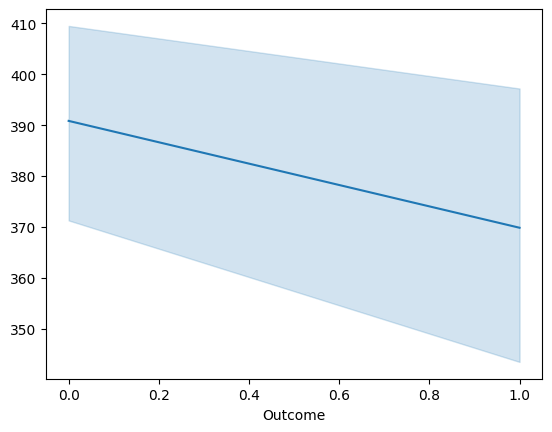

In [73]:
sns.lineplot(x="Outcome",y=p_df.Outcome.index, data=p_df)

<AxesSubplot: xlabel='Outcome'>

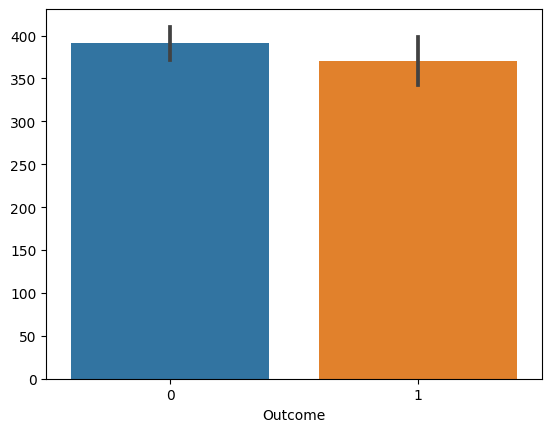

In [74]:
sns.barplot(x="Outcome",y=p_df.Outcome.index, data=p_df)

<AxesSubplot: xlabel='Insulin', ylabel='BloodPressure'>

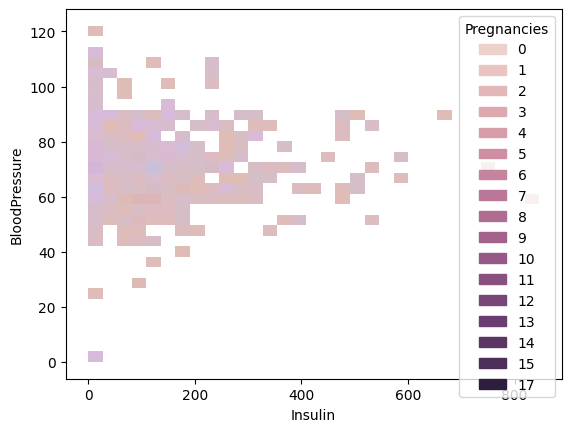

In [85]:
sns.histplot(x="Insulin",y="BloodPressure", hue="Pregnancies", data=p_df, color="r")